In [137]:
import pandas as pd
import numpy as np
import math
import datetime
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt

table = pd.read_csv("../orari/route.csv", delimiter=";")
time_table = pd.read_csv("../orari/route_time.csv", delimiter=";")
path = "../orari/IndirizziBiblio_21-10-2019.ods"
indirizzi = read_ods(path, 'Questionari_normalizza')
indirizzi=indirizzi.astype({'Cap':'int32'})

dft = pd.read_csv("../distanze/times_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
dfd = pd.read_csv("../distanze/distances_computed.csv", delimiter=";", encoding = "ISO-8859-1", index_col=0)
num_orders = pd.read_csv("../num_orders.csv", delimiter=";", encoding = "ISO-8859-1")
orders = pd.read_csv("../request_cr.csv", delimiter=",", encoding = "ISO-8859-1")
def translate_name(dframe, fur):
    df = pd.DataFrame({})
    for d in fur.columns:
        df1 = pd.DataFrame([getName(dframe, x) for x in list(fur[d].dropna())], columns = [d])
        df = pd.concat([df,df1], ignore_index=False, axis=1)
    return df
def get_row(df, string):
    return pd.Series(df.index).str.contains(string.strip(), case=False)

def get_column(df, string):
    return pd.Series(df.columns).str.contains(string.strip(), case=False)
def getName(df, nome):
    if nome.lower() == "crema":
        nome ="crema,"
    city = df[get_row(df, nome).values].index[0]
    return city


# Analisi first schedule

In [5]:
first_schedule = translate_name(dft, table)

In [45]:
schedule_cities = []
for i in first_schedule.columns:
    schedule_cities = schedule_cities + list(first_schedule[i].dropna())
total_cities = indirizzi[indirizzi['Calendarizzata (sì/no)'] == 'sì']
num_of_cities = len(set(schedule_cities))
print(f"rapporto tra il numero di città nella schedulazione iniziale e quelle disponibili calendarizzate: la schedulazione non presenta città mancanti\n rapporto: {num_of_cities/len(total_cities)}")
print(f"numero totali di città considerabili: {len(total_cities)}")

rapporto tra il numero di città nella schedulazione iniziale e quelle disponibili calendarizzate: la schedulazione non presenta città mancanti
 rapporto: 1.0
numero totali di città considerabili: 64


# Analisi indirizzi biblio

In [72]:
comuni = total_cities['Comune'].dropna()
com_distribution = list(set([(x, list(comuni).count(x)) for x in list(comuni)]))
print(f"numero di comuni in cui sono presenti le città calendarizzate: {len(com_distribution)}")
print("città con ripetizioni:")
for x in com_distribution:
    if x[1] > 1:
        print(f"{x[0]}, {x[1]}")

province = total_cities['Provincia'].dropna()
pro_distribution = list(set([(x, list(province).count(x)) for x in list(province)]))
print(f"numero di province in cui sono presenti le città calendarizzate: {len(pro_distribution)}")
print(f"distribuzione province:")
for x in pro_distribution: 
    print(f"{x[0]}, {x[1]}")
    
print("da cui si sottolineano le tre città di un'altra provincia:")
print(total_cities[total_cities['Provincia'] != 'CR'][['Comune', 'Provincia']])

numero di comuni in cui sono presenti le città calendarizzate: 60
città con ripetizioni:
Crema, 2
Cremona, 4
numero di province in cui sono presenti le città calendarizzate: 4
distribuzione province:
MN, 1
CR, 61
LO, 1
BS, 1
da cui si sottolineano le tre città di un'altra provincia:
              Comune Provincia
18  Casalpusterlengo        LO
69          Manerbio        BS
70           Viadana        MN


# Analisi scambi biblioteche

In [163]:
import time
from datetime import date

week = {0: "lunedi", 1:"martedi", 2:"mercoledi", 3:"giovedi", 4:"venerdi", 5:"sabato", 6:"domenica"}
dal = orders['data_richiesta'][0].split(" ")[0]
al = orders['data_richiesta'][len(orders)-1].split(" ")[0]
print(f"numero ordini: {len(orders)}, dal {dal} al {al}")

duemila_16 = []
duemila_17 = []
duemila_18 = []

for i in tdqm(range(len(orders))):
    if orders.loc[i]['data_richiesta'].split(" ")[0].split("-")[0] == '2016':
        duemila_16.append(orders.loc[i])
    elif orders.loc[i]['data_richiesta'].split(" ")[0].split("-")[0] == '2017':
        duemila_17.append(orders.loc[i])
    elif orders.loc[i]['data_richiesta'].split(" ")[0].split("-")[0] == '2018':
        duemila_18.append(orders.loc[i])

numero ordini: 159642, dal 2016-01-01 al 2018-10-21


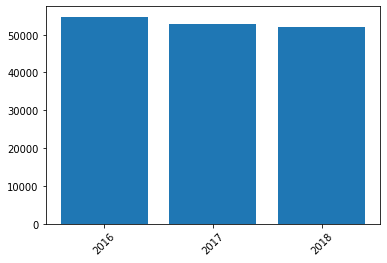

In [171]:
plt.bar(['2016', '2017', '2018'] ,[len(duemila_16), len(duemila_17), len(duemila_18)])
plt.xticks(rotation = 45)
plt.show()

In [157]:
freq = pd.Series(data = [0,0,0,0,0,0,0], index = ["lunedi", "martedi","mercoledi", "giovedi","venerdi", "sabato", "domenica"])


for x in orders['data_richiesta']:
    d = x.split(' ')[0]
    try:
        n = week.get(date.fromisoformat(d).weekday())
        freq[n] = freq[n] + 1
    except:
        print(d)
        break

numero ordini: 159642, dal 2016-01-01 al 2018-10-21


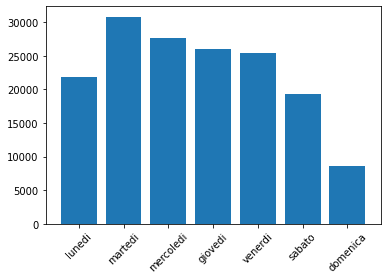

In [147]:
plt.bar(freq.keys() ,freq.values)
plt.xticks(rotation = 45)
plt.show()